# Analysing Movement Data in Space and Time

Time-series and data-driven Spatio-temporal animations with 33 Golden Eagles over ten years.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style style.available
import seaborn as sns
import plotly_express as px

In [4]:
df = pd.read_csv("goldenEagles_dataset.csv")
df.head()

event-id  visible                timestamp  location-long  location-lat  \
0  1604825583     True  2005-10-12 11:40:00.000       -106.411        34.704   
1  1604825616     True  2005-10-13 00:07:01.000       -106.424        34.700   
2  1604825617     True  2005-10-13 00:49:37.000       -106.361        34.713   
3  1604825618     True  2005-10-13 01:47:16.000       -106.432        34.701   
4  1604825619    False  2005-10-15 03:01:07.000       -109.127        36.337   

  algorithm-marked-outlier  argos:iq    comments location-error-text  \
0                      NaN        11  StartPoint               <26 m   
1                      NaN        11         NaN           350-999 m   
2                      NaN        11         NaN             >1000 m   
3                      NaN        11         NaN           350-999 m   
4                     True        11         NaN             >1000 m   

  manually-marked-outlier individual-taxon-canonical-name  \
0                     NaN               Aquila chrysaetos   
1                     NaN               Aquila chrysaetos   
2                     NaN               Aquila chrysaetos   
3                     NaN               Aquila chrysaetos   
4                     NaN               Aquila chrysaetos   

   tag-local-identifier individual-local-identifier  \
0                 11515                      11515a   
1                 11515                      11515a   
2                 11515                      11515a   
3                 11515                      11515a   
4                 11515                      11515a   

                              study-name  
0  HawkWatch International Golden Eagles  
1  HawkWatch International Golden Eagles  
2  HawkWatch International Golden Eagles  
3  HawkWatch International Golden Eagles  
4  HawkWatch International Golden Eagles

In [5]:
df.shape

(25458, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25458 entries, 0 to 25457
Data columns (total 14 columns):
event-id                           25458 non-null int64
visible                            25458 non-null bool
timestamp                          25458 non-null object
location-long                      25458 non-null float64
location-lat                       25458 non-null float64
algorithm-marked-outlier           2259 non-null object
argos:iq                           25458 non-null int64
comments                           33 non-null object
location-error-text                25458 non-null object
manually-marked-outlier            5 non-null object
individual-taxon-canonical-name    25458 non-null object
tag-local-identifier               25458 non-null int64
individual-local-identifier        25458 non-null object
study-name                         25458 non-null object
dtypes: bool(1), float64(2), int64(3), object(8)
memory usage: 2.5+ MB


In [7]:
df['timestamp'].min(), df['timestamp'].max()

('1999-10-02 12:25:00.000', '2009-10-27 18:30:21.000')

## Exploratory Data Analysis (EDA)

In [9]:
style.use('seaborn-poster') 
style.use('ggplot')

NameError: name 'style' is not defined

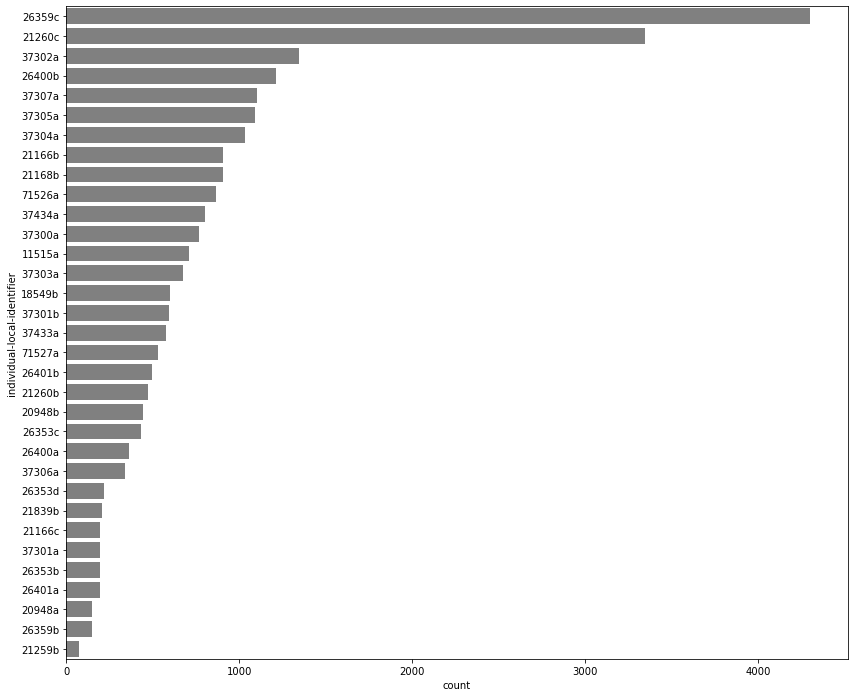

In [19]:
fig, ax = plt.subplots(1, figsize=(14,12))
sns.countplot(y='individual-local-identifier', color="grey", data=df, order = df['individual-local-identifier'].value_counts().index);
plt.savefig("countplot.png")

In [20]:
px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")
px.scatter_mapbox(df, lat='location-lat', lon='location-long', zoom=2, width=900, height=800)

In [21]:
# Filter out outliers
df= df[(df['algorithm-marked-outlier'].isnull())&(df['manually-marked-outlier'].isnull())]
# Plot scatter map with Plotly Express
px.scatter_mapbox(df, lat='location-lat', lon='location-long', zoom=2, width=900, height=800)

## Reference Data

In [22]:
ref_df = pd.read_csv("reference_table.csv")
ref_df.head()

tag-id animal-id       animal-taxon           deploy-on-date  \
0   26400    26400a  Aquila chrysaetos  1999-10-02 00:00:00.000   
1   26401    26401a  Aquila chrysaetos  1999-10-09 00:00:00.000   
2   20948    20948a  Aquila chrysaetos  2000-10-19 00:00:00.000   
3   20948    20948b  Aquila chrysaetos  2001-09-24 00:00:00.000   
4   26353    26353b  Aquila chrysaetos  2001-10-04 00:00:00.000   

           deploy-off-date                           animal-death-comments  \
0  2000-06-12 23:59:59.000                                             NaN   
1  2000-04-24 23:59:59.000                                             NaN   
2  2001-01-07 23:59:59.000  Dead bird (late Dec/earlyJan 2000) - recovered   
3  2002-06-20 23:59:59.000                                             NaN   
4  2002-01-05 23:59:59.000                                             NaN   

  animal-exact-date-of-birth animal-life-stage animal-ring-id animal-sex  \
0    1999-07-04 00:00:00.000                HY      629-42582          m   
1    1999-07-11 00:00:00.000                HY      629-42562          m   
2    2000-07-21 00:00:00.000                HY      629-23838          m   
3    2001-06-26 00:00:00.000                HY      629-42570          f   
4    2001-07-06 00:00:00.000                HY     0629-27782          m   

  attachment-type                            deployment-end-comments  \
0         harness  Stop transmit 12 June 2000 - voltage failure -...   
1         harness  Stop transmit 24 April 2000 - voltage failure ...   
2         harness     Dead bird (late Dec/earlyJan 2000) - recovered   
3         harness  Stop transmit 20 June 2002 - good sensors - no...   
4         harness  Stop transmit early Jan 2002 - voltage droppin...   

  deployment-id manipulation-type             study-site  \
0        26400a              none  Goshute Mountains, NV   
1        26401a              none  Goshute Mountains, NV   
2        20948a              none  Goshute Mountains, NV   
3        20948b              none  Goshute Mountains, NV   
4        26353b              none  Manzano Mountains, NM   

               tag-manufacturer-name  tag-mass tag-readout-method  
0  North Star Science and Technology        80          satellite  
1  North Star Science and Technology        80          satellite  
2  North Star Science and Technology        80          satellite  
3  North Star Science and Technology        80          satellite  
4  North Star Science and Technology        80          satellite

In [23]:
ref_df['animal-id'].nunique()

33

In [24]:
ref_df['deploy-off-date'] =  pd.to_datetime(ref_df['deploy-off-date'])
ref_df['deploy-on-date'] =  pd.to_datetime(ref_df['deploy-on-date'])


ref_df['age'] = (ref_df['deploy-off-date'] - ref_df['deploy-on-date']).astype('timedelta64[M]')

ref_df.head(2)

tag-id animal-id       animal-taxon deploy-on-date     deploy-off-date  \
0   26400    26400a  Aquila chrysaetos     1999-10-02 2000-06-12 23:59:59   
1   26401    26401a  Aquila chrysaetos     1999-10-09 2000-04-24 23:59:59   

  animal-death-comments animal-exact-date-of-birth animal-life-stage  \
0                   NaN    1999-07-04 00:00:00.000                HY   
1                   NaN    1999-07-11 00:00:00.000                HY   

  animal-ring-id animal-sex attachment-type  \
0      629-42582          m         harness   
1      629-42562          m         harness   

                             deployment-end-comments deployment-id  \
0  Stop transmit 12 June 2000 - voltage failure -...        26400a   
1  Stop transmit 24 April 2000 - voltage failure ...        26401a   

  manipulation-type             study-site              tag-manufacturer-name  \
0              none  Goshute Mountains, NV  North Star Science and Technology   
1              none  Goshute Mountains, NV  North Star Science and Technology   

   tag-mass tag-readout-method  age  
0        80          satellite  8.0  
1        80          satellite  6.0

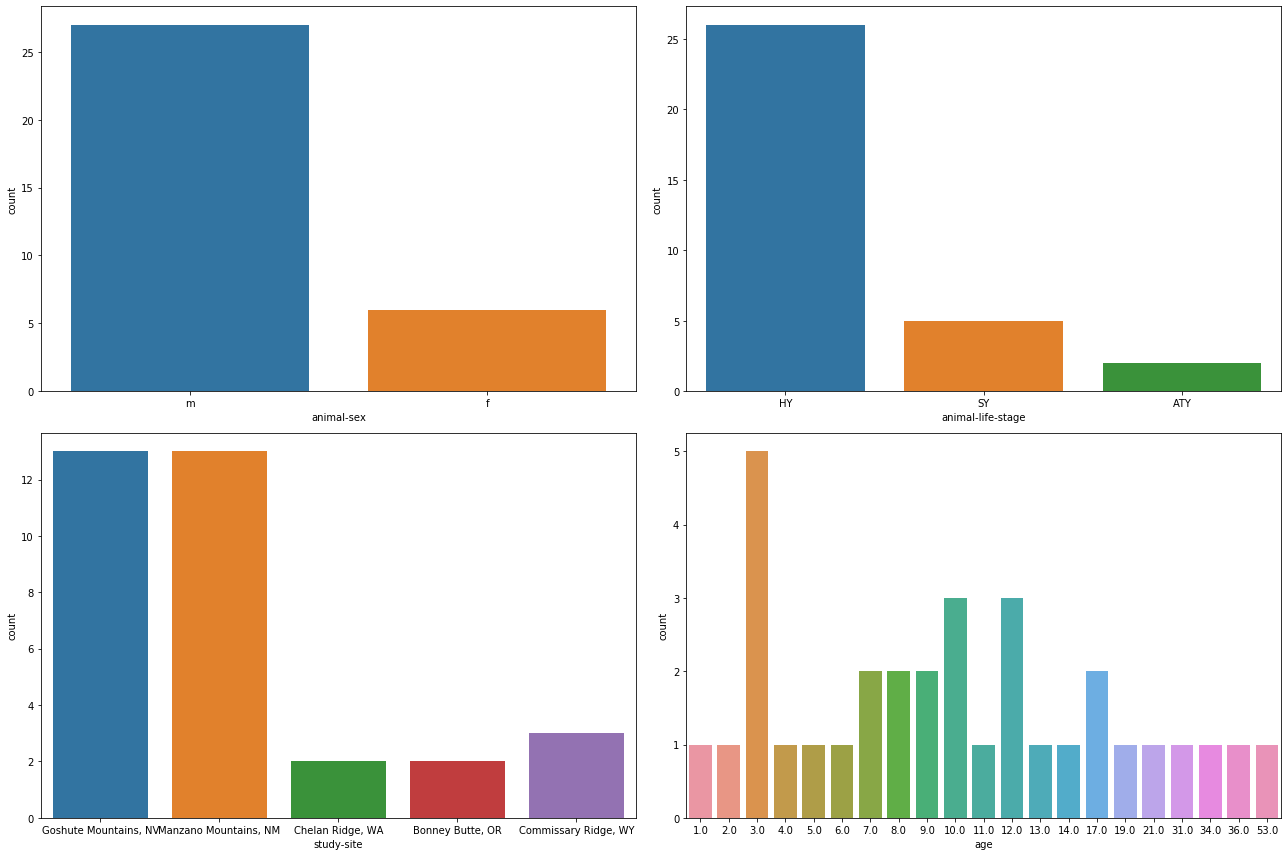

In [25]:
fig, ax = plt.subplots(2,2, figsize=(18,12))
sns.countplot(ref_df['animal-sex'], ax= ax[0,0])
sns.countplot(ref_df['animal-life-stage'], ax= ax[0,1])
sns.countplot(ref_df['study-site'], ax= ax[1,0])
sns.countplot(ref_df['age'], ax= ax[1,1])
plt.tight_layout()
plt.savefig("coutplots.png")
plt.show()

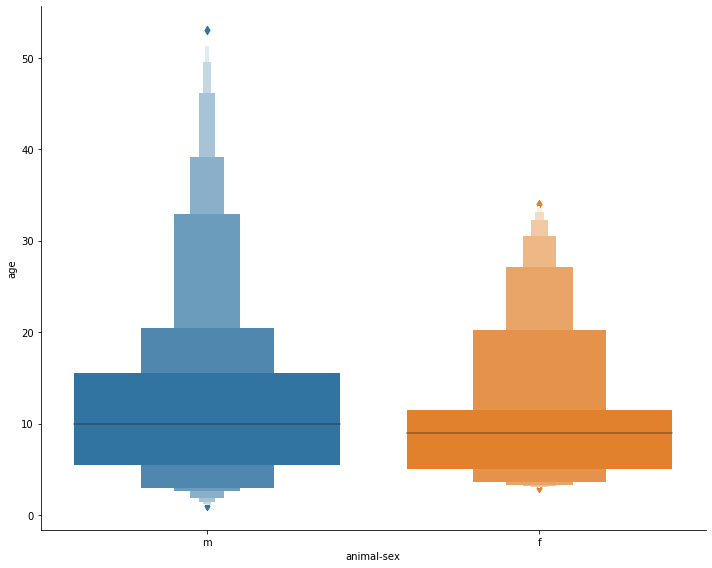

In [26]:
sns.catplot(x="animal-sex", y='age', kind="boxen", height=8, aspect=10/8, data=ref_df);
plt.savefig("sex.png")

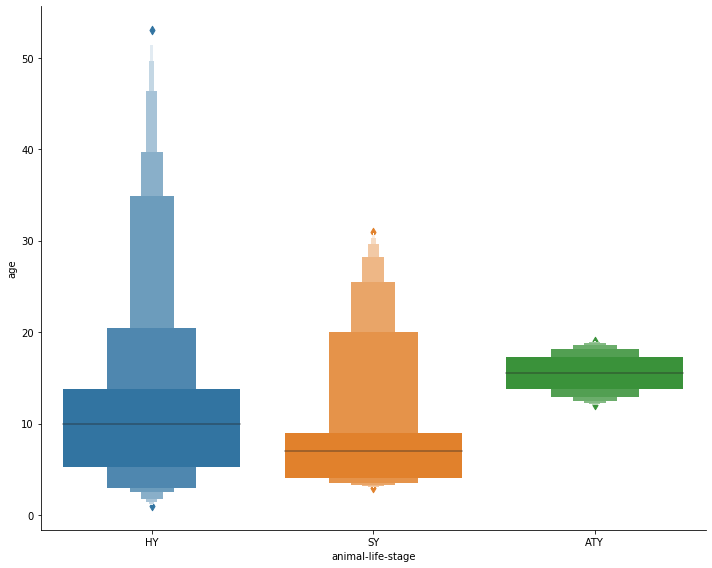

In [27]:
sns.catplot(x="animal-life-stage", y='age', kind="boxen", height=8, aspect=10/8, data=ref_df);
plt.savefig("stage.png")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

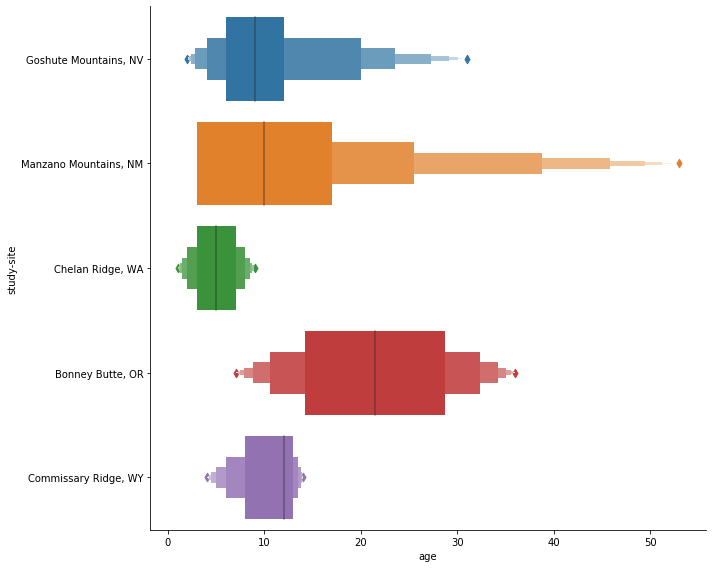

In [28]:
sns.catplot(x="age", y='study-site', kind="boxen", orient="h", height=8, aspect=10/8, data=ref_df);
plt.savefig("site.png")

### Merge 

In [29]:
ref_df.columns

Index(['tag-id', 'animal-id', 'animal-taxon', 'deploy-on-date',
       'deploy-off-date', 'animal-death-comments',
       'animal-exact-date-of-birth', 'animal-life-stage', 'animal-ring-id',
       'animal-sex', 'attachment-type', 'deployment-end-comments',
       'deployment-id', 'manipulation-type', 'study-site',
       'tag-manufacturer-name', 'tag-mass', 'tag-readout-method', 'age'],
      dtype='object')

In [30]:
ref = ref_df[['animal-id','deploy-on-date',
       'deploy-off-date', 'animal-sex',  'study-site']]
ref.head()

animal-id deploy-on-date     deploy-off-date animal-sex  \
0    26400a     1999-10-02 2000-06-12 23:59:59          m   
1    26401a     1999-10-09 2000-04-24 23:59:59          m   
2    20948a     2000-10-19 2001-01-07 23:59:59          m   
3    20948b     2001-09-24 2002-06-20 23:59:59          f   
4    26353b     2001-10-04 2002-01-05 23:59:59          m   

              study-site  
0  Goshute Mountains, NV  
1  Goshute Mountains, NV  
2  Goshute Mountains, NV  
3  Goshute Mountains, NV  
4  Manzano Mountains, NM

In [31]:
df_merged = pd.merge(df, ref, left_on="individual-local-identifier", right_on="animal-id")
df_merged.head()

event-id  visible                timestamp  location-long  location-lat  \
0  1604825583     True  2005-10-12 11:40:00.000       -106.411        34.704   
1  1604825616     True  2005-10-13 00:07:01.000       -106.424        34.700   
2  1604825617     True  2005-10-13 00:49:37.000       -106.361        34.713   
3  1604825618     True  2005-10-13 01:47:16.000       -106.432        34.701   
4  1604825621     True  2005-10-17 04:19:03.000       -108.430        37.835   

  algorithm-marked-outlier  argos:iq    comments location-error-text  \
0                      NaN        11  StartPoint               <26 m   
1                      NaN        11         NaN           350-999 m   
2                      NaN        11         NaN             >1000 m   
3                      NaN        11         NaN           350-999 m   
4                      NaN        11         NaN           150-349 m   

  manually-marked-outlier individual-taxon-canonical-name  \
0                     NaN               Aquila chrysaetos   
1                     NaN               Aquila chrysaetos   
2                     NaN               Aquila chrysaetos   
3                     NaN               Aquila chrysaetos   
4                     NaN               Aquila chrysaetos   

   tag-local-identifier individual-local-identifier  \
0                 11515                      11515a   
1                 11515                      11515a   
2                 11515                      11515a   
3                 11515                      11515a   
4                 11515                      11515a   

                              study-name animal-id deploy-on-date  \
0  HawkWatch International Golden Eagles    11515a     2005-10-12   
1  HawkWatch International Golden Eagles    11515a     2005-10-12   
2  HawkWatch International Golden Eagles    11515a     2005-10-12   
3  HawkWatch International Golden Eagles    11515a     2005-10-12   
4  HawkWatch International Golden Eagles    11515a     2005-10-12   

      deploy-off-date animal-sex             study-site  
0 2008-09-02 23:59:59          f  Manzano Mountains, NM  
1 2008-09-02 23:59:59          f  Manzano Mountains, NM  
2 2008-09-02 23:59:59          f  Manzano Mountains, NM  
3 2008-09-02 23:59:59          f  Manzano Mountains, NM  
4 2008-09-02 23:59:59          f  Manzano Mountains, NM

In [32]:
df_merged.shape

(23194, 19)

In [33]:
df_merged["study-site"].value_counts()

Manzano Mountains, NM    10067
Goshute Mountains, NV     7116
Bonney Butte, OR          3564
Commissary Ridge, WY      1835
Chelan Ridge, WA           612
Name: study-site, dtype: int64

## Where do these birds migrate? at What time?

In [34]:
df_merged['month'] = pd.DatetimeIndex(df_merged['timestamp']).month
df_merged['month_year'] = pd.to_datetime(df_merged['timestamp']).dt.to_period('M')
df_merged['quarter_year'] = pd.to_datetime(df_merged['timestamp']).dt.to_period('Q')
df_merged['quarter'] = df_merged['quarter_year'].astype(str).str[-2:]
df_merged['month_year_st'] = df_merged["month_year"].dt.strftime('%Y-%m')
df_merged.head()

event-id  visible                timestamp  location-long  location-lat  \
0  1604825583     True  2005-10-12 11:40:00.000       -106.411        34.704   
1  1604825616     True  2005-10-13 00:07:01.000       -106.424        34.700   
2  1604825617     True  2005-10-13 00:49:37.000       -106.361        34.713   
3  1604825618     True  2005-10-13 01:47:16.000       -106.432        34.701   
4  1604825621     True  2005-10-17 04:19:03.000       -108.430        37.835   

  algorithm-marked-outlier  argos:iq    comments location-error-text  \
0                      NaN        11  StartPoint               <26 m   
1                      NaN        11         NaN           350-999 m   
2                      NaN        11         NaN             >1000 m   
3                      NaN        11         NaN           350-999 m   
4                      NaN        11         NaN           150-349 m   

  manually-marked-outlier  ... animal-id  deploy-on-date     deploy-off-date  \
0                     NaN  ...    11515a      2005-10-12 2008-09-02 23:59:59   
1                     NaN  ...    11515a      2005-10-12 2008-09-02 23:59:59   
2                     NaN  ...    11515a      2005-10-12 2008-09-02 23:59:59   
3                     NaN  ...    11515a      2005-10-12 2008-09-02 23:59:59   
4                     NaN  ...    11515a      2005-10-12 2008-09-02 23:59:59   

  animal-sex             study-site month month_year quarter_year quarter  \
0          f  Manzano Mountains, NM    10    2005-10       2005Q4      Q4   
1          f  Manzano Mountains, NM    10    2005-10       2005Q4      Q4   
2          f  Manzano Mountains, NM    10    2005-10       2005Q4      Q4   
3          f  Manzano Mountains, NM    10    2005-10       2005Q4      Q4   
4          f  Manzano Mountains, NM    10    2005-10       2005Q4      Q4   

   month_year_st  
0        2005-10  
1        2005-10  
2        2005-10  
3        2005-10  
4        2005-10  

[5 rows x 24 columns]

In [35]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23194 entries, 0 to 23193
Data columns (total 24 columns):
event-id                           23194 non-null int64
visible                            23194 non-null bool
timestamp                          23194 non-null object
location-long                      23194 non-null float64
location-lat                       23194 non-null float64
algorithm-marked-outlier           0 non-null object
argos:iq                           23194 non-null int64
comments                           33 non-null object
location-error-text                23194 non-null object
manually-marked-outlier            0 non-null object
individual-taxon-canonical-name    23194 non-null object
tag-local-identifier               23194 non-null int64
individual-local-identifier        23194 non-null object
study-name                         23194 non-null object
animal-id                          23194 non-null object
deploy-on-date                     23194 non-null 

In [36]:
px.scatter_mapbox(df_merged, 
                  lat='location-lat', 
                  lon='location-long', 
                  color= 'individual-local-identifier', 
                  animation_frame='month_year_st', 
                  zoom=2,
                  
                 )


In [37]:
px.scatter_mapbox(df_merged, 
                  lat='location-lat', 
                  lon='location-long', 
                  color= 'study-site', 
                  animation_frame=str('quarter'), 
                  zoom=2,
                  
                 )